<center><font size=+4 color='white'><b>Telco Customer Churn</b></font></center>

## Training Tree Based Models
- XGBoost
- Tree Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
##loading dataset
df=pd.read_csv('TelcoChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PromptInput,CustomerFeedback
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Write a realistic customer feedback based on t...,I have been using the DSL internet service fro...
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,Write a realistic customer feedback based on t...,I have been a customer with this company for o...
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Write a realistic customer feedback based on t...,I recently signed up for DSL internet service ...
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Write a realistic customer feedback based on t...,I have been a loyal customer with this company...
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Write a realistic customer feedback based on t...,I recently switched to this fiber optic intern...


## Variable data types

In [3]:
##variable data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
PromptInput          object
CustomerFeedback     object
dtype: object

## Observation 
Target variable is a categorical data type, So it is a classification problem.

## Shape of the dataset

In [4]:
## shape
df.shape

(7043, 23)

## Missing Values

In [5]:
##missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
PromptInput         0
CustomerFeedback    0
dtype: int64

## Data Imbalance check

In [6]:
##Imbalance check
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Observation
High class imbalance in dataset.

In [7]:
## Duplicate check
df.duplicated().value_counts()

False    7043
Name: count, dtype: int64

<center><font size=+4 color='white'><b> Univariate Analysis</b></font></center>

## Required columns

In [8]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PromptInput,CustomerFeedback
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Write a realistic customer feedback based on t...,I have been using the DSL internet service fro...


In [9]:
##Required columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'PromptInput', 'CustomerFeedback'],
      dtype='object')

In [10]:
##new columns
col=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges','CustomerFeedback', 'Churn']
df_train=df[col]

In [11]:
##displaying all the columns and values
pd.set_option('display.max_columns',None)
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerFeedback,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,I have been using the DSL internet service fro...,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,I have been a customer with this company for o...,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,I recently signed up for DSL internet service ...,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,I have been a loyal customer with this company...,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,I recently switched to this fiber optic intern...,Yes


In [12]:
## Descriptive stats for numerical feature
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


## Observation
So, 75% of Tenure is 55 which means 75% of Tenure is less than 55 months.

In [13]:
##Descriptive stats for categorical feature
df_train.describe(include='object').T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [14]:
##only categorical feature
cat_cols=[feat for feat in df_train.columns if df_train[feat].dtype=='object']
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'CustomerFeedback',
 'Churn']

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
#displaying all the values
# list(df_train['TotalCharges'].unique())

## Observation 
TotalCharges values originally seems float datatype but due to the presence of unnecessary blanks made it object datatype

In [17]:
##checking other feature has the same issues
df_train[cat_cols].head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,CustomerFeedback,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,I have been using the DSL internet service fro...,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,I have been a customer with this company for o...,No


In [18]:
# ##clean columns MultipleLines
# #copy of the first data

# ##clean
# dfc['MultipleLines'].replace({'No phone service':'No'}, inplace=True)
# dfc['MultipleLines'].value_counts()

In [19]:
# ##features to clean
# unclean_col=['MultipleLines',
#             'OnlineSecurity',
#             'OnlineBackup',
#             'DeviceProtection',
#             'TechSupport',
#             'StreamingTV',
#             'StreamingMovies']

In [20]:
# ##cleaned feature
# for i in unclean_col:
#     dfc[i].replace({'No internet service':'No'},inplace=True)

In [21]:
##checking the unique values of the categorical feature
dfc=df_train.copy()
for i in cat_cols:
    if i!='CustomerFeedback':
        print(dfc[i].value_counts())
        print('='*30,end='\n')

gender
Male      3555
Female    3488
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
StreamingTV
No                     2810
Y

In [22]:
#head of dataframe
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Cleaning TotalCharges column
TotalCharges feature seems object datatype, infact it is actually a float datatype.

In [23]:
##type casting cleaning
##converting empty space into numpy nan value and then apply type casting technique to convert into float

# dfc['TotalCharges']=dfc['TotalCharges'].replace({' ':np.nan}).astype(float)

In [24]:
##Alternative of type casting
dfc['TotalCharges']=pd.to_numeric(dfc['TotalCharges'], errors='coerce')

In [25]:
##checking null values
dfc.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
CustomerFeedback     0
Churn                0
dtype: int64

## Observation 
TotalCharges feature has 11 null values

## Missing value imputation

In [26]:
dfc['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

## Observation 
Here in the stats:
- Mean > Median > Mode
- Mean = 2283.300441
- Median = 1397.475000
- Mode = 20.2
- Standard Dev. = 2266.771362


## Inference
- The Standaed deviation is nearly equal to mean of the feature which means the datapoints are widly spread, so it has high variability/spreadness.
- Even the range of datapoints seems quite large; __Max-Min__= 8684.8-18 =>8666.8.
- Mean > Median: mean is greater than median,hence, the TotalCharges feature is __Right Skewed__. 
- Customer are very inconsistent because some of them are paying less and others paying extremly high.


In [27]:
##impute missing value
dfc['TotalCharges'].fillna(dfc['TotalCharges'].median(),inplace=True)

In [28]:
dfc.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
CustomerFeedback    0
Churn               0
dtype: int64

## Visualizing skewness of TotalCharges using Histogram

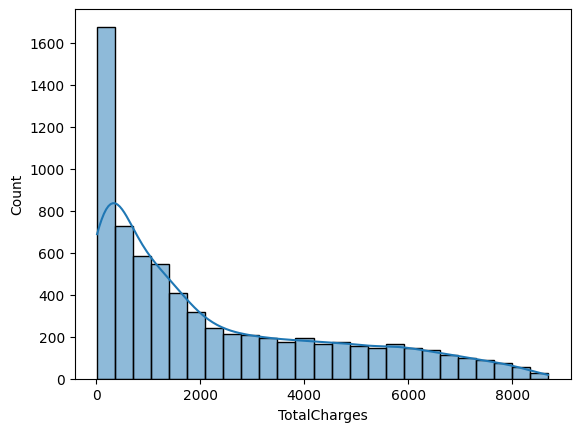

In [29]:
##TotalCharges distribution[Histogram]
##Checking skewness using histogram
sns.histplot(dfc['TotalCharges'],kde=True)
plt.show()


## Visualizing Outliers using boxplot

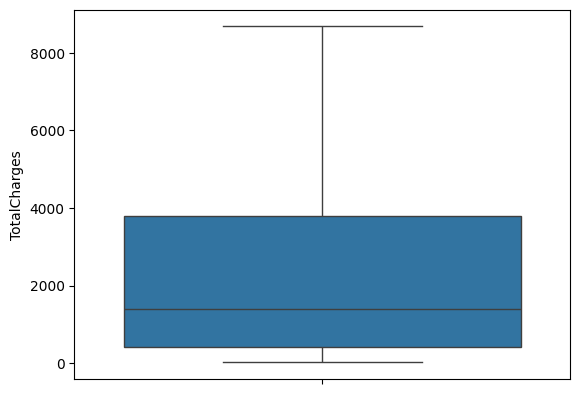

In [30]:
##outliers
sns.boxplot(dfc['TotalCharges'])
plt.show()

## Statistics to check Skewness and Outliers

In [31]:
##skew stats
print(f'Checking skewness of Total Charges column: {dfc['TotalCharges'].skew()}')

Checking skewness of Total Charges column: 0.9637890936414892


## Observation
Yes, it has moderate skewness

In [32]:
##outlier
Q1=dfc['TotalCharges'].quantile(.25)
Q3=dfc['TotalCharges'].quantile(.75)
IQR=Q3-Q1
upperbound=Q3+1.5*IQR
lowerbound=Q1-1.5*IQR
print(upperbound)
print(lowerbound)

8863.1625
-4674.3375


## Observation
- Upper bound = 8884.67
- Lower bound = -4688.48
- Minimum value = 18
- Maximum value = 8684.8

## Compare:
- Max (8684.8) < Upper Bound (8884.67) 
- Min (18) > Lower Bound (−4688.48) 
### Inference:
No data points lie outside the lower or upper bounds.
- So, there are no outliers according to the IQR method.

In [33]:
##stats to validate the existance of outliers
from scipy.stats import kurtosis
print(dfc['TotalCharges'].kurtosis())

-0.22640031928829618


## Observation
The kurtosis value: -0.231 is much lesser than 3 which means this feature is low risk of outliers or in other words the feature has no such outliers to handle.

In [34]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [35]:
num_feat=[num for num in dfc.columns if dfc[num].dtype!='O']
num_feat

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [36]:
dfc['TotalCharges'].isnull().sum()

np.int64(0)

In [37]:
## checking skewness and outliers
for feature in num_feat:
    print(f'The skewness value of {feature} is {dfc[feature].skew()}')
    if dfc[feature].skew()>0:
        print(f'{feature} is Right Skewed.')
    elif dfc[feature].skew()==0:
        print(f'{feature} is Normally distributed.')
    else:
        print(f'{feature} is Left Skewed.')
    print(f'Outlier risk of {feature} is {dfc[feature].kurtosis()}')
    if dfc[feature].kurtosis()<3:
        print(f"{feature} is a low risk of Outliers feature.")
    else:
        print(f'{feature} is a high risk of Outliers feature.')
    print('%'*59)

The skewness value of SeniorCitizen is 1.8336327440928568
SeniorCitizen is Right Skewed.
Outlier risk of SeniorCitizen is 1.3625958957939117
SeniorCitizen is a low risk of Outliers feature.
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The skewness value of tenure is 0.2395397495619829
tenure is Right Skewed.
Outlier risk of tenure is -1.387371635971685
tenure is a low risk of Outliers feature.
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The skewness value of MonthlyCharges is -0.2205244339439803
MonthlyCharges is Left Skewed.
Outlier risk of MonthlyCharges is -1.2572596945495056
MonthlyCharges is a low risk of Outliers feature.
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
The skewness value of TotalCharges is 0.9637890936414892
TotalCharges is Right Skewed.
Outlier risk of TotalCharges is -0.22640031928829618
TotalCharges is a low risk of Outliers feature.
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


## Transformation we are supposed to apply on Skewed features:
1. For Left skew: 
    - Square
    - Exponential
2. For Right skew:
    - log(x + 1)
    - Square root

## Visualizing skewness/distribution of all Numerical feature using Histogram

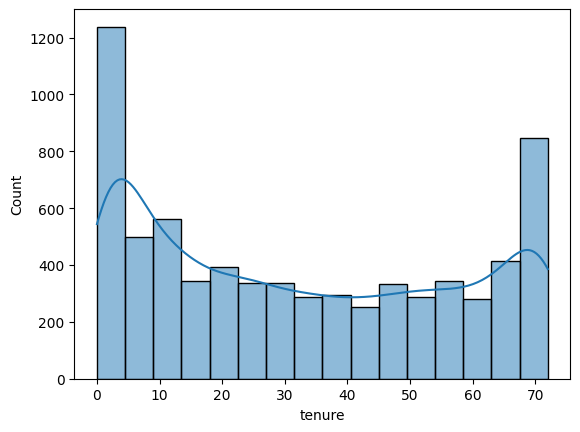

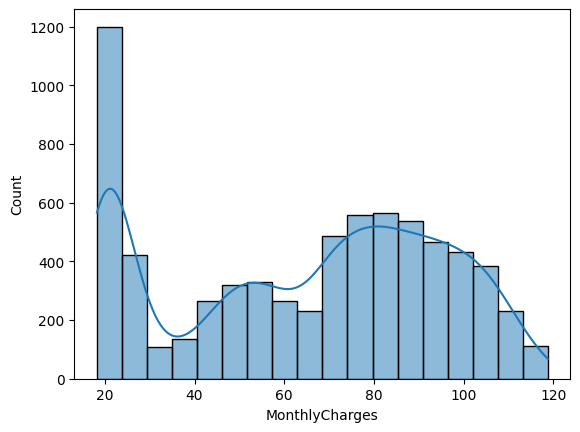

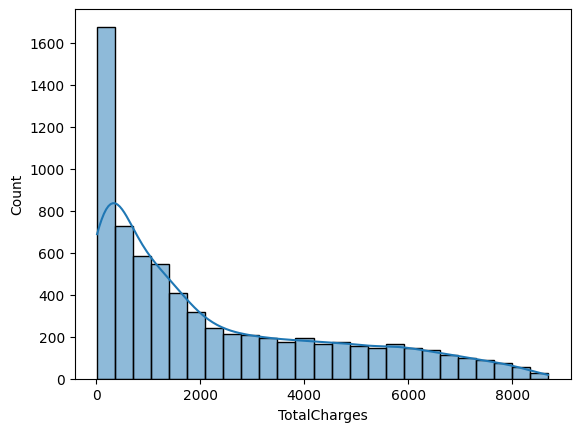

In [38]:
##Histogram for numerical feature
for num in num_feat:
    if num!='SeniorCitizen':
        sns.histplot(dfc[num], kde=True)
        plt.show()

## Visualizing outliers of numerical feature using Boxplot

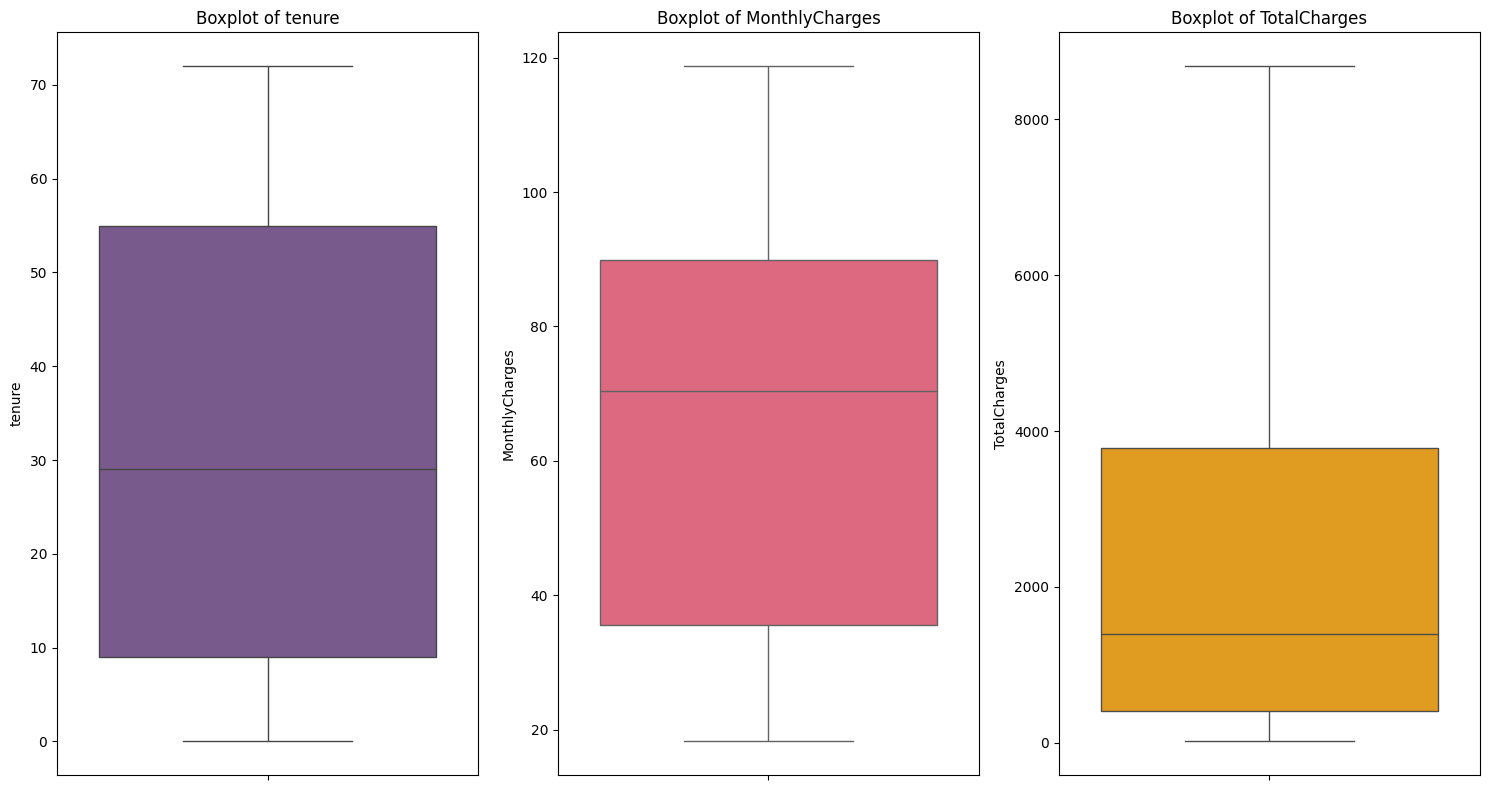

In [39]:
##outliers in boxplot
num_feats=[i for i in num_feat if i!='SeniorCitizen']
dashboard_palette = [
    "#003f5c",  # Blue
    "#7a5195",  # Purple
    "#ef5675",  # Red
    "#ffa600",  # Yellow
    "#00bfae",  # Teal
    "#58508d",  # Dark Purple
    "#bc5090",  # Pink
    "#ff6361"   # Coral Red
]
plt.figure(figsize=(15,8))
for i,out in enumerate(num_feats,start=1):
    plt.subplot(1,3,i)
    sns.boxplot(dfc[out], color = dashboard_palette[i % len(dashboard_palette)])
    plt.title(f'Boxplot of {out}')
plt.tight_layout()   
plt.show()

## Categorical feature Analysis

Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: proportion, dtype: float64


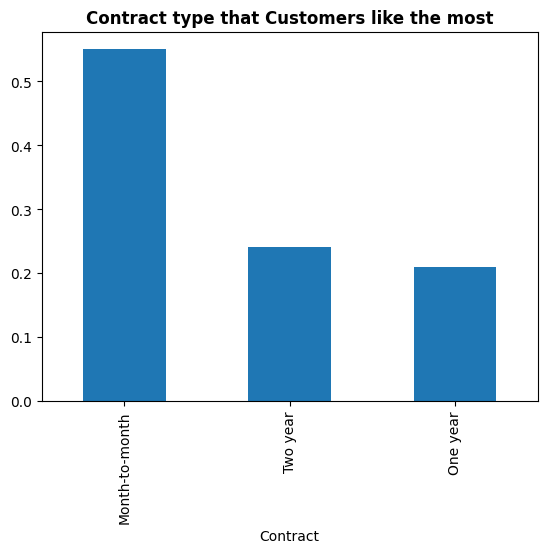

In [40]:
##Value counts of unique contract values in our dataset
print(dfc['Contract'].value_counts(normalize=True)*100)
dfc['Contract'].value_counts(normalize=True).plot(kind='bar')
plt.title('Contract type that Customers like the most', fontweight='bold')
plt.show()

## Observation
Maximum Customers choose the cotract type Month-to-Month among three contract type and followed by Two-year contract type as second most in the dataset.

In [41]:
unique_colors = [
    "#549fd9",  # Light Blue
    "#4dd361",  # Mint Green
    "#e2e05a",  # Yellowish
    "#f3b059",  # Orange
    "#ff7f0e",  # Bold Orange
    "#e31a1c",  # Strong Red
    "#e56be7",  # Violet
    "#6a3d9a",  # Purple
    "#5c9ec2",  # Pale Blue
    "#33a02c",  # Green
    "#9b7272",  # Light Red
    "#962bcb",  # Light Purple
    "#ff1493",  # Deep Pink
    "#8b0000"   # Dark Red
]

## Proportion of customers on each different Contract

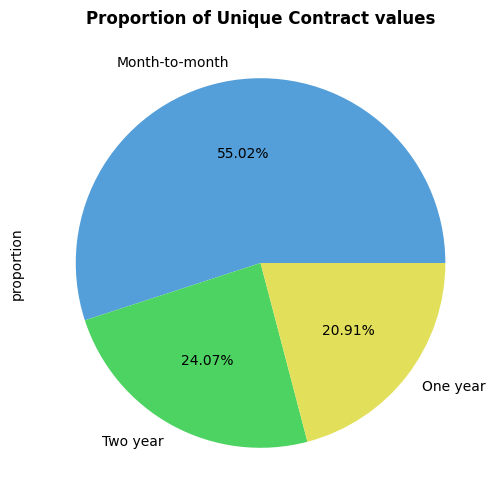

In [42]:
##Proportion of customers on Contract
plt.figure(figsize=(9,6))
dfc['Contract'].value_counts(normalize=True).plot(kind='pie',autopct='%1.2f%%', colors = unique_colors)
plt.title("Proportion of Unique Contract values", fontweight='bold')
plt.show()

## Observation
- 55% of Customers has been on Month-to-Month contract, also most probably this contract type has maximum churn proportion of customer.
- Only 24.1% of Customers took Two years of contract.
- 20.9% of Customer is on one year contract.

In [43]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'CustomerFeedback',
 'Churn']

<center><font size=+4 color='white'><b> Bivariate Analysis</b></font></center>

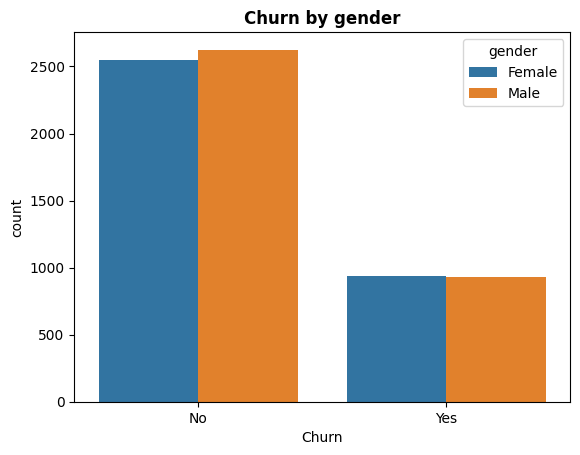

In [44]:
##churn by gender
sns.countplot(x='Churn',hue='gender', data=dfc)
plt.title("Churn by gender", fontweight='bold')
plt.show()

## Observation 
There is no big difference based on gender.

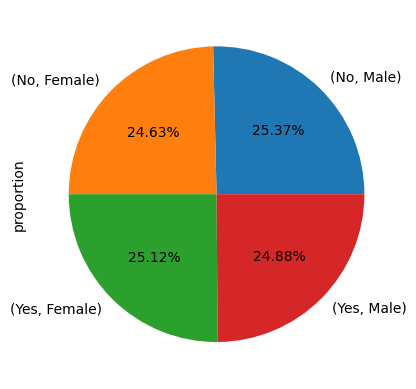

In [45]:
dfc.groupby('Churn')['gender'].value_counts(normalize=True).plot(kind='pie',autopct='%1.2f%%')
plt.show()

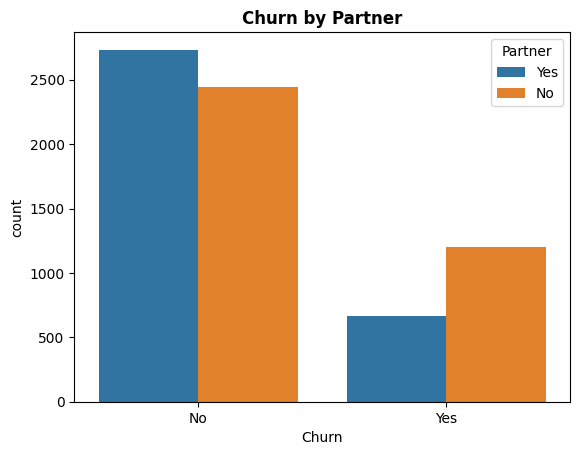

In [46]:
##chuurn by partner
sns.countplot(x='Churn',hue='Partner', data=dfc)
plt.title("Churn by Partner", fontweight='bold')
plt.show()

## Observation
In terms of churn, those who doesn't have  partners are more likely to churn as compared to those who has partners.

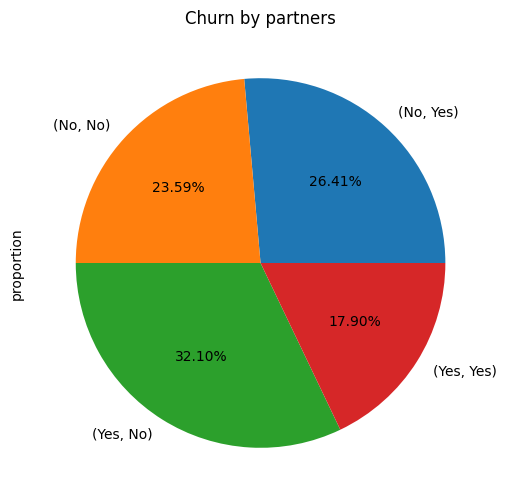

In [47]:
## Churn by partners in percentage
plt.figure(figsize=(10,6))
dfc.groupby('Churn')['Partner'].value_counts(normalize=True).plot(kind='pie', autopct='%1.2f%%')
plt.title("Churn by partners")
plt.show()

## Observation
In our dataset we have 32.10% of the customer churned who has no partners at all, but those who has partners they actually have less churn rate around 17.90%.

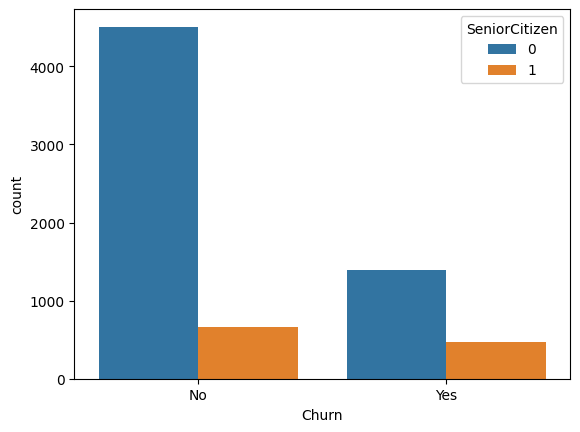

In [48]:
##Churn by SeniorCitizen
sns.countplot(x='Churn',hue='SeniorCitizen',data=dfc)
plt.show()

## Observation
Churn rate is high among the not senior citizen.

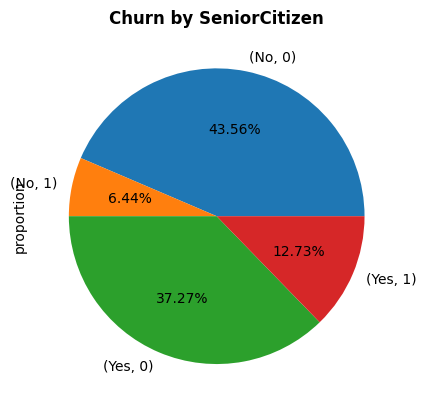

In [49]:
##SeniorCitizen churn rate
dfc.groupby('Churn')['SeniorCitizen'].value_counts(normalize=True).plot(kind='pie',autopct='%1.2f%%')
plt.title("Churn by SeniorCitizen", fontweight='bold')
plt.show()

## Observation 
In the dataset 37.27% of non senior citizens have high churn rate and only 12.73% of senior citizen has churned.

<Axes: xlabel='Churn', ylabel='count'>

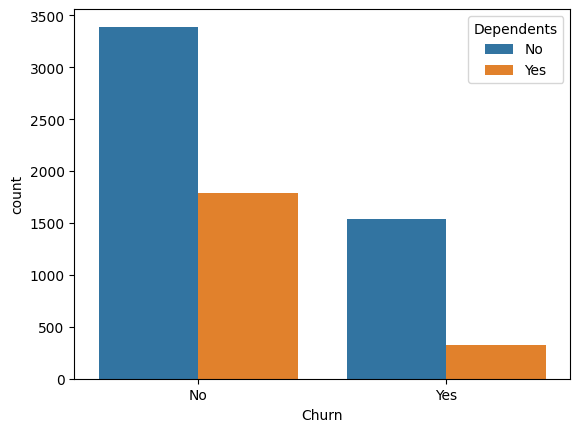

In [50]:
sns.countplot(x='Churn', hue='Dependents', data=dfc)

<Axes: xlabel='Churn', ylabel='count'>

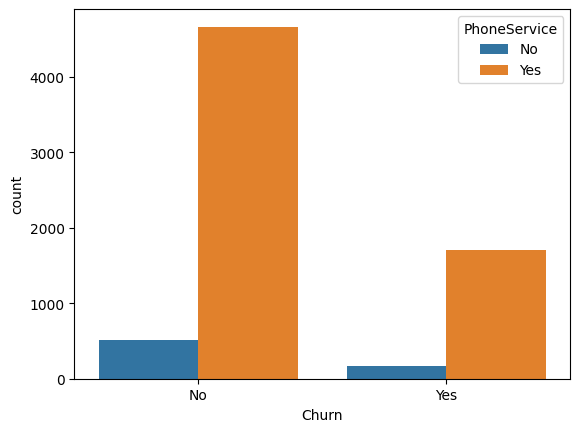

In [51]:
sns.countplot(x='Churn', hue='PhoneService', data=dfc)

## Observation
Customer subscribed for the Phone Service has high retention, even though customer has phone service has churned.

<Axes: xlabel='Churn', ylabel='count'>

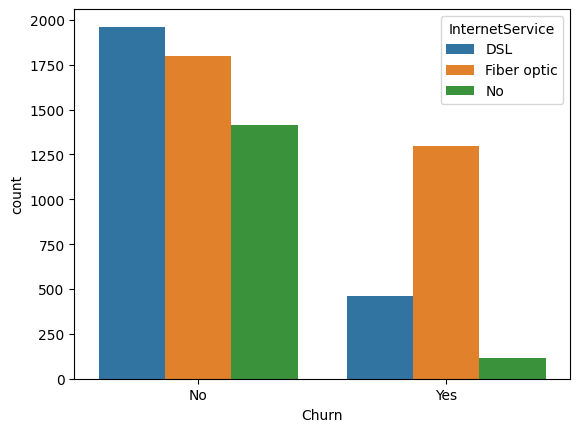

In [52]:
sns.countplot(x='Churn',hue='InternetService',data=dfc)

## Observation
Customer who has DSL internet Service posses high retention rate, and those who have fiber optics internet service are likely to churn. 

<Axes: xlabel='Churn', ylabel='count'>

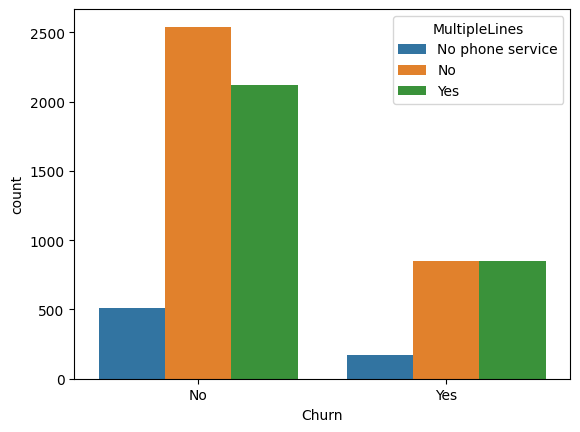

In [53]:
sns.countplot(x='Churn',hue='MultipleLines',data=dfc)

<Axes: xlabel='Churn', ylabel='count'>

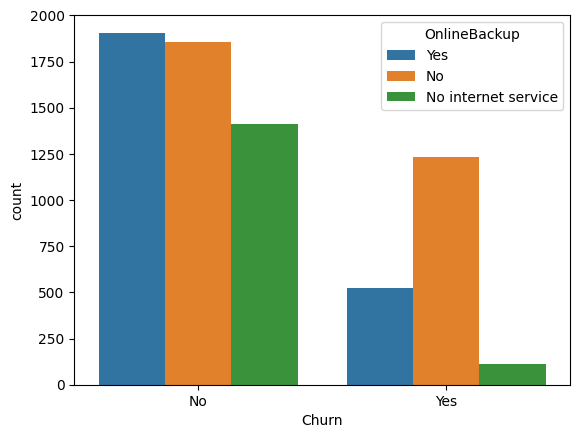

In [54]:
sns.countplot(x='Churn', hue=dfc['OnlineBackup'], data=dfc)

## Observation
No online backup customer are most likely to churn and high retention who has taken online backup service.

<Axes: xlabel='Churn', ylabel='count'>

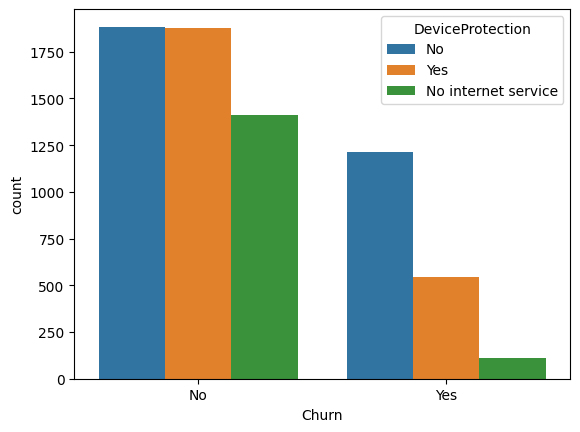

In [55]:
sns.countplot(x='Churn',hue=dfc['DeviceProtection'],data=dfc)

## Observation
Customer are less likely to churn who has device protection service but customer who don't have this service may easily churn.

<Axes: xlabel='Churn', ylabel='count'>

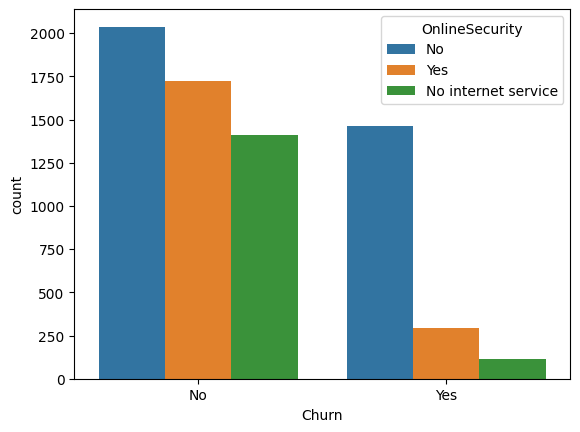

In [56]:
sns.countplot(x='Churn', hue=dfc['OnlineSecurity'],data=dfc)

<Axes: xlabel='Churn', ylabel='count'>

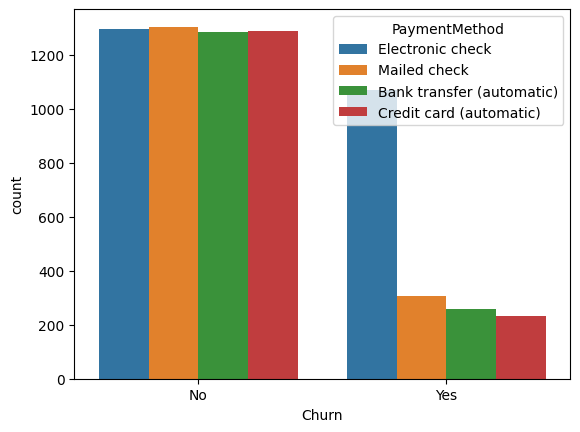

In [57]:
sns.countplot(x='Churn',hue=dfc['PaymentMethod'],data=dfc)

<Axes: ylabel='proportion'>

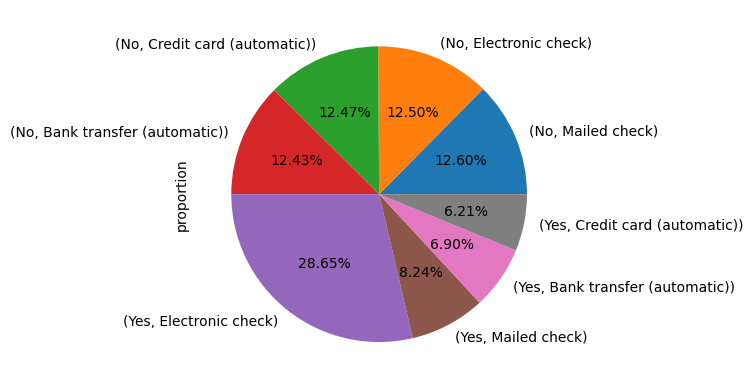

In [58]:
dfc.groupby('Churn')['PaymentMethod'].value_counts(normalize=True).plot(kind='pie', autopct='%1.2f%%')

## Observation
In the sample dataset around 29% of customer churned who uses Electronic check payment method.

<Axes: xlabel='Churn', ylabel='count'>

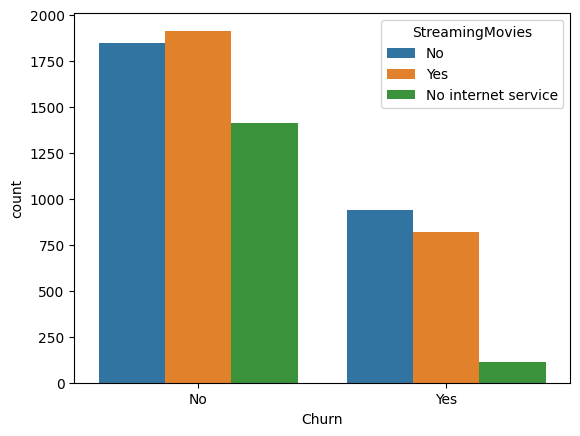

In [59]:
sns.countplot(x='Churn', hue=dfc['StreamingMovies'], data=dfc)

<Axes: xlabel='Churn', ylabel='count'>

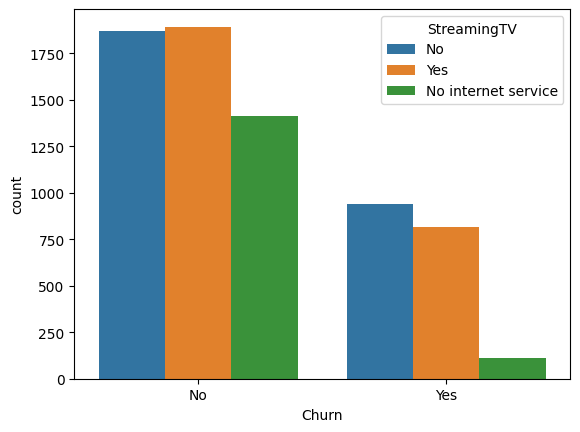

In [60]:
sns.countplot(x='Churn',hue=dfc['StreamingTV'],data=dfc)

<Axes: xlabel='Churn', ylabel='count'>

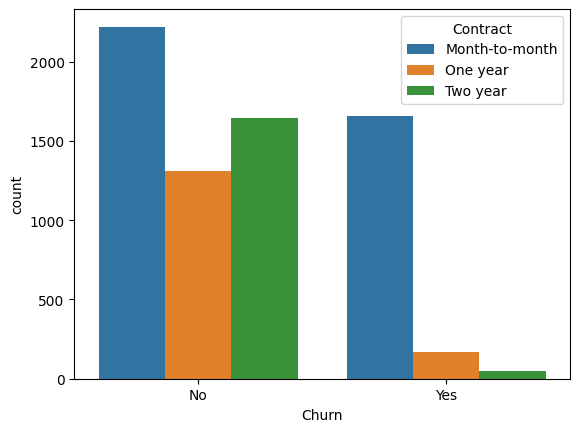

In [61]:
sns.countplot(x='Churn',hue=dfc['Contract'],data=dfc)

In [62]:
# ##converting churn into numeric value
# dfc['Churn']=dfc['Churn'].replace({'Yes':1,'No':0})
# dfc['Churn'].head(4)

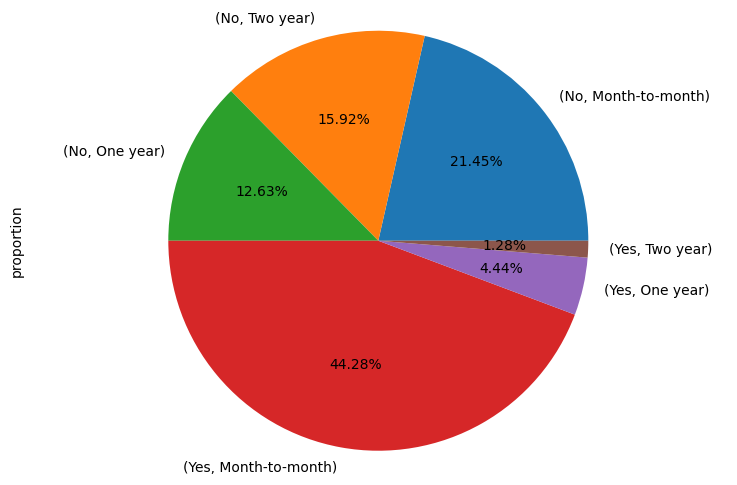

In [63]:
##Churned customer on contract feature
plt.figure(figsize=(9,6))
dfc.groupby('Churn')['Contract'].value_counts(normalize=True).plot(kind='pie',autopct='%1.2f%%')
plt.axis('equal')
plt.show()

## Observation
- The shortest contract would have highest churn rate, so Month-to-Month contract is the shortest contract in the sample dataset and also has highest churn rate i.e 44%.
- So, the longest contract(i.e. Two-Year) probably have less churn rate i.e 1.28% in our dataset.

## Hypothesis Testing
__Null (H0)__: Contract type and Churn feature are independent to each other or has no effect.

__Alternative (H1)__: Contract type and Churn are associated with each other or has effect.

In [64]:
## hypothesis test
from scipy.stats import chi2_contingency
##cross table in dataframe table
contengency_table=pd.crosstab(dfc['Contract'],dfc['Churn'])
print(contengency_table)
print('@'*45)

##statistical testing step 
chi2, p_value, dof, expected_value=chi2_contingency(contengency_table)
print(f'Chi2 statistic value is {chi2}')
print('='*45)
print(f'Significance value p-Value is {p_value}')
print('='*45)
print(f'Degree of freedom in contengency table is {dof}')
print('='*45)
print(f'Expected value is {expected_value}')
print('#'*50)
if p_value<0.05:
    print('p-Value is really small, so we can reject the Null hypothesis.Therefore, the Contract feature has association with Churn feature in our sample dataset.')
else:
    print('p-Value is greater than significance value hence, there is no evidence to reject the Null hypothesis. So, this means Contract feature has no such association with Churn feature.')

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Chi2 statistic value is 1184.5965720837926
Significance value p-Value is 5.863038300673393e-258
Degree of freedom in contengency table is 2
Expected value is [[2846.69175067 1028.30824933]
 [1082.11018032  390.88981968]
 [1245.198069    449.801931  ]]
##################################################
p-Value is really small, so we can reject the Null hypothesis.Therefore, the Contract feature has association with Churn feature in our sample dataset.


In [65]:
## hypothesis test
from scipy.stats import chi2_contingency
##cross table in dataframe table
contengency_table=pd.crosstab(dfc['PaymentMethod'],dfc['Churn'])
print(contengency_table)
print('@'*45)

##statistical testing step 
chi2, p_value, dof, expected_value=chi2_contingency(contengency_table)
print(f'Chi2 statistic value is {chi2}')
print('='*45)
print(f'Significance value p-Value is {p_value}')
print('='*45)
print(f'Degree of freedom in contengency table is {dof}')
print('='*45)
print(f'Expected value is {expected_value}')
print('#'*50)
if p_value<0.05:
    print('p-Value is really small, so we can reject the Null hypothesis.Therefore, the PaymentMethod feature has association with Churn feature in our sample dataset.')
else:
    print('p-Value is greater than significance value hence, there is no evidence to reject the Null hypothesis. So, this means PaymentMethod feature has no such association with Churn feature.')

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Chi2 statistic value is 648.1423274814
Significance value p-Value is 3.6823546520098007e-140
Degree of freedom in contengency table is 3
Expected value is [[1134.26891949  409.73108051]
 [1118.10705665  403.89294335]
 [1737.40025557  627.59974443]
 [1184.22376828  427.77623172]]
##################################################
p-Value is really small, so we can reject the Null hypothesis.Therefore, the PaymentMethod feature has association with Churn feature in our sample dataset.


In [66]:
dfc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerFeedback,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,I have been using the DSL internet service fro...,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,I have been a customer with this company for o...,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,I recently signed up for DSL internet service ...,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,I have been a loyal customer with this company...,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,I recently switched to this fiber optic intern...,Yes


## Feature Encoding

In [67]:
dfc['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [68]:
##categorical feature
cat_feat=[col for col in dfc.columns if dfc[col].dtype=='o' and dfc[col]!='CustomerFeedback']
text=['CustomerFeedback']


In [69]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Correlation

<Axes: >

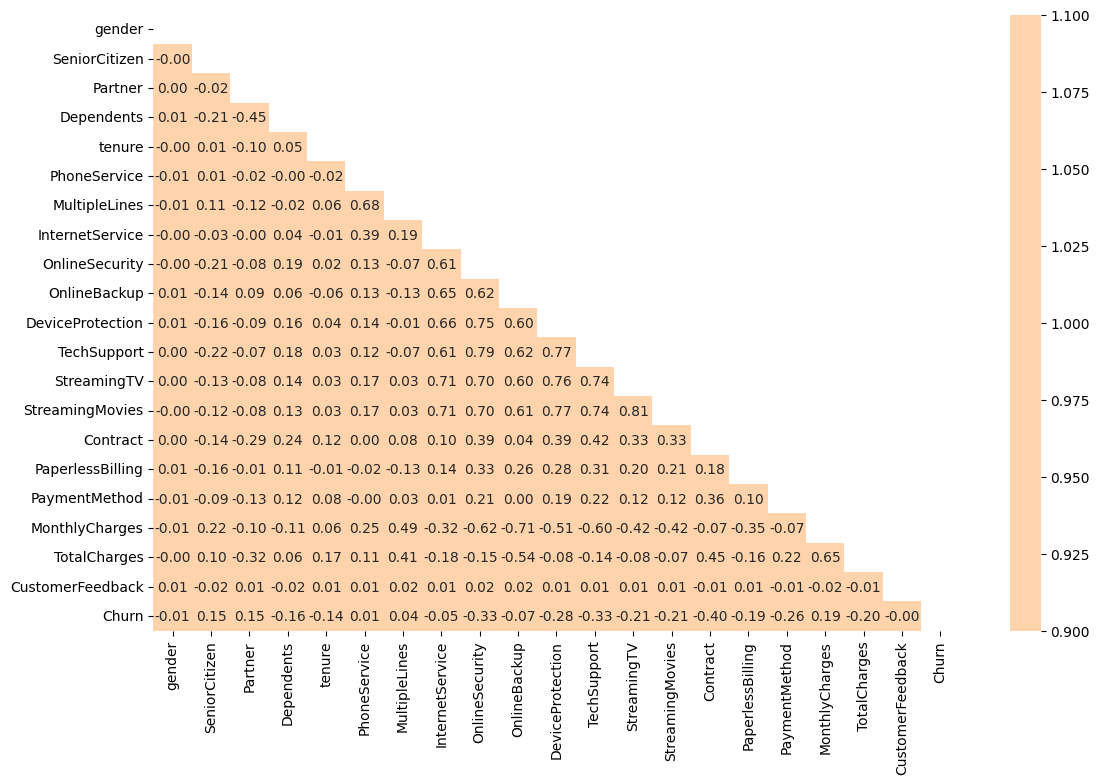

In [70]:
corr_fact=dfc.apply(lambda x: pd.factorize(x)[0] if x.dtype!='float64' else x)
plt.figure(figsize=(13,8))
sns.heatmap(corr_fact.corr(), mask=np.triu(np.ones_like(corr_fact.corr(), dtype=bool)),vmax=1, vmin=1,center=0,annot=True,fmt='.2f')

In [71]:
##skew to normal 
from sklearn.preprocessing import PowerTransformer
##object of PT
pt=PowerTransformer(method='yeo-johnson')

##transformation on left skewed feature
dfc['MonthlyCharges']=pt.fit_transform(dfc[['MonthlyCharges']])

##transformation on right skewed feature
dfc['TotalCharges']=pt.fit_transform(dfc[['TotalCharges']])
dfc['tenure']=pt.fit_transform(dfc[['tenure']])

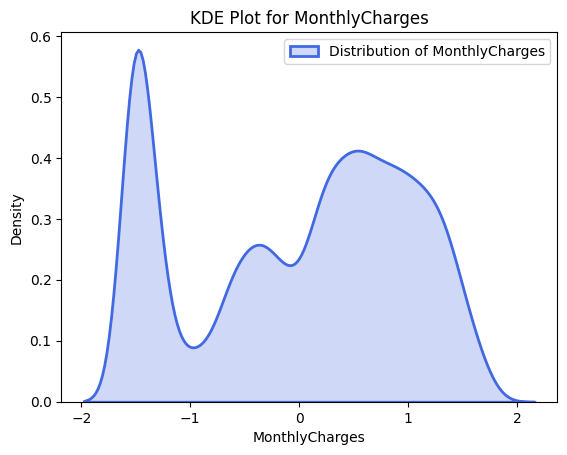

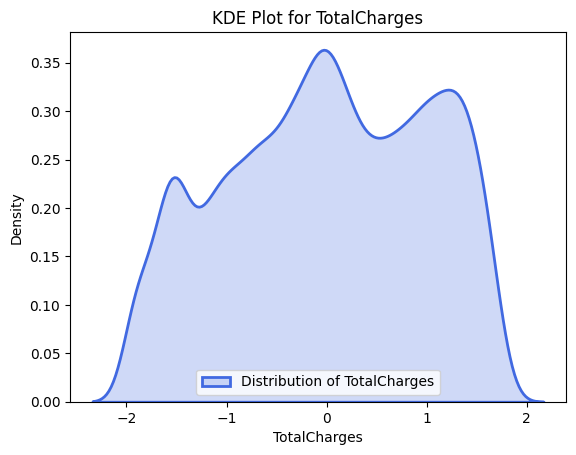

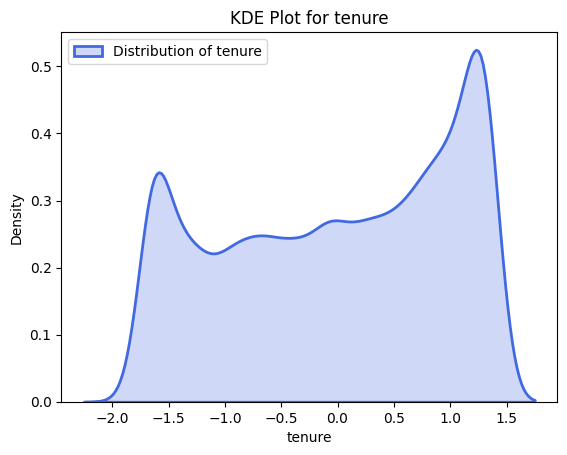

In [72]:
transformed_cols=['MonthlyCharges','TotalCharges','tenure']
for i in transformed_cols:
    sns.kdeplot(
    x=dfc[i],
    fill=True,
    bw_adjust=0.8,
    linewidth=2,
    # linestyle='--',
    color='royalblue',
    # clip=(0, dfc[i].max()),
    label=f'Distribution of {i}'
)
    plt.legend()
    plt.title(f"KDE Plot for {i}")
    plt.show()

# Feature Encoding

In [73]:
##encoding based on feature labels
cat_feat=[col for col in dfc.columns if dfc[col].dtype=='O' and col!='CustomerFeedback' and col!='Churn']

for i in cat_feat:
    print(f'{i}:{dfc[i].unique()}')
    print('-'*30)

gender:['Female' 'Male']
------------------------------
Partner:['Yes' 'No']
------------------------------
Dependents:['No' 'Yes']
------------------------------
PhoneService:['No' 'Yes']
------------------------------
MultipleLines:['No phone service' 'No' 'Yes']
------------------------------
InternetService:['DSL' 'Fiber optic' 'No']
------------------------------
OnlineSecurity:['No' 'Yes' 'No internet service']
------------------------------
OnlineBackup:['Yes' 'No' 'No internet service']
------------------------------
DeviceProtection:['No' 'Yes' 'No internet service']
------------------------------
TechSupport:['No' 'Yes' 'No internet service']
------------------------------
StreamingTV:['No' 'Yes' 'No internet service']
------------------------------
StreamingMovies:['No' 'Yes' 'No internet service']
------------------------------
Contract:['Month-to-month' 'One year' 'Two year']
------------------------------
PaperlessBilling:['Yes' 'No']
------------------------------
Paymen

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
## feature that requires label encoding and one hot encoding
le_cols=['gender','Partner','Dependents','PhoneService','PaperlessBilling']


In [ ]:
##encoding
##columns and encoders
le_encoder={}
for col in le_cols:
    lab_encoder=LabelEncoder()
    dfc[col]=lab_encoder.fit_transform(dfc[col])
    le_encoder[col]=lab_encoder


In [78]:
dfc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CustomerFeedback,Churn
0,0,0,1,0,-1.644343,0,1,0,0,2,0,0,0,0,0,1,2,-1.158541,-1.811104,I have been using the DSL internet service fro...,No
1,1,0,0,0,0.297205,1,0,0,2,0,2,0,0,0,1,0,3,-0.239492,0.254277,I have been a customer with this company for o...,No
2,1,0,0,0,-1.495444,1,0,0,2,2,0,0,0,0,0,1,3,-0.342665,-1.387090,I recently signed up for DSL internet service ...,Yes
3,1,0,0,0,0.646327,0,1,0,2,0,2,2,0,0,1,0,0,-0.731079,0.233221,I have been a loyal customer with this company...,No
4,0,0,0,0,-1.495444,1,0,1,0,0,0,0,0,0,0,1,2,0.213545,-1.249770,I recently switched to this fiber optic intern...,Yes


In [ ]:
##manually contract feature engineer
dfc['Contract'].replace({'Month-to-month':0,'One year':1,'Two year':2},inplace=True)

In [ ]:
dfc_c=dfc.copy()
## multiclass label category encoding
cols_ohe_encoder={
          'MultipleLines':OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
          'InternetService':OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
          'OnlineSecurity':OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
          'OnlineBackup':OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
          'DeviceProtection':OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
          'TechSupport':OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
          'StreamingTV':OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
          'StreamingMovies':OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
          'PaymentMethod':OneHotEncoder(sparse_output=False, handle_unknown='ignore')}

ohe_encoded=[]
for col, encoder in cols_ohe_encoder.items():
    ##fit and transform the feature, gives transformed array of new feature
    transformed_array=encoder.fit_transform(dfc_c[[col]])
    ##new transformed columns name 
    new_columns=encoder.get_feature_names_out([col])
    ##only new transformed array into dataframe
    encoded_df=pd.DataFrame(transformed_array, columns=new_columns, index=dfc_c.index)
    ##append all the columns in ohe_encoded
    ohe_encoded.append(encoded_df)
    ##drop columns which is not required
    dfc_c.drop(columns=col, inplace=True, axis=1)

#Concatenate all encoded columns back to the main DataFrame
dfc_c = pd.concat([dfc_c] + ohe_encoded, axis=1)

In [ ]:
dfc_c

In [ ]:
##Target feature encoding
dfc_c['Churn'].replace({'Yes':1,'No':0},inplace=True)

In [ ]:
dfc_c.head()

# Training Data

In [ ]:
dfc_df=dfc_c.drop(columns='CustomerFeedback', axis=1)

In [ ]:
dfc_df.head()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, recall_score,precision_score,f1_score,roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTETomek

In [ ]:
## Independent features and response 
X=dfc_df.drop(columns='Churn')
y=dfc_df['Churn']

In [ ]:
##train  test split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape

In [ ]:
X_train.isnull().sum()

# Over sampling:
The dataset we have in small amount,so rather than losing information by under sampling, i choose Over sampling __(SMOTE: Synthetic Minority Over-Sampling Technique)__

In [ ]:
##resampling the data
sampling=SMOTETomek(random_state=42)
x_train_smote, y_train_smote=sampling.fit_resample(X_train,y_train)

# Model Training

In [ ]:

models={
    'svc':SVC(),
    'rf':RandomForestClassifier(class_weight='balanced'),
    'lr':LogisticRegression(),
    'ab':AdaBoostClassifier(),
    'xb':XGBClassifier(class_weight='balanced'),
    'gb':GradientBoostingClassifier(),
    'lgbm':LGBMClassifier()
}

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(x_train_smote,y_train_smote)

    ##prediction
    y_pred_train=model.predict(x_train_smote)
    y_pred_test=model.predict(X_test)

    ##metrics report
    accuracyscore_train=accuracy_score(y_pred_train,y_train_smote)
    f1score_train=f1_score(y_pred_train,y_train_smote)
    precisionscore_train=precision_score(y_pred_train,y_train_smote)
    recallscore_train=recall_score(y_pred_train,y_train_smote)
    confusionmatrix_train=confusion_matrix(y_pred_train,y_train_smote)
    classificationreport_train=classification_report(y_pred_train,y_train_smote)
    rocaucscore_train=roc_auc_score(y_pred_train,y_train_smote)

    ##test metrics report
    accuracyscoretest=accuracy_score(y_pred_test,y_test)
    f1scoretest=f1_score(y_pred_test,y_test)
    precisionscoretest=precision_score(y_pred_test,y_test)
    recallscoretest=recall_score(y_pred_test,y_test)
    confusionmatrixtest=confusion_matrix(y_pred_test,y_test)
    classificationreporttest=classification_report(y_pred_test,y_test)
    rocaucscoretest=roc_auc_score(y_pred_test,y_test)

    print(list(models.keys())[i])
    ##print the evaluation metrics
    print('Model Performance on Training set')
    print(f'accuracy: {round(accuracyscore_train,3)}')
    print(f'precision: {round(precisionscore_train,3)}')
    print(f'recall : {round(recallscore_train,3)}')
    print(f'f1 : {round(f1score_train,3)}')
    print(f'roc auc : {round(rocaucscore_train,3)}')
    print(f'classification report :{classificationreport_train}')
    print(f'confusion matrix: {confusionmatrix_train}')
    print('---------------------------------------------------')
    ##print the evaluation metrics
    print('Model Performance on Test set')
    print(f'accuracy: {round(accuracyscoretest,3)}')
    print(f'precision: {round(precisionscoretest,3)}')
    print(f'recall: {round(recallscoretest,3)}')
    print(f'f1: {round(f1scoretest,3)}')
    print(f'roc auc : {round(rocaucscoretest,3)}')
    print(f'classification report: {classificationreporttest}')
    print(f'confusion matrix: {confusionmatrixtest}')

    print('='*35,'\n')


gb
Model Performance on Training set
accuracy: 0.859
precision: 0.884
recall : 0.842
f1 : 0.862
roc auc : 0.86
classification report :              precision    recall  f1-score   support

           0       0.83      0.88      0.86      3760
           1       0.88      0.84      0.86      4150

    accuracy                           0.86      7910
   macro avg       0.86      0.86      0.86      7910
weighted avg       0.86      0.86      0.86      7910

confusion matrix: [[3300  460]
 [ 655 3495]]
---------------------------------------------------
Model Performance on Test set
accuracy: 0.785
precision: 0.764
recall: 0.562
f1: 0.648
roc auc : 0.734
classification report:               precision    recall  f1-score   support

           0       0.79      0.91      0.85       913
           1       0.76      0.56      0.65       496

    accuracy                           0.78      1409
   macro avg       0.78      0.73      0.75      1409
weighted avg       0.78      0.78      0.78 

## Best performing Models
1. Gradient Boosting
    - accuracy: 0.786
    - precision: 0.767
    - f1: 0.65
    - roc auc : 0.735
2. Adaboost
    - accuracy: 0.774
    - precision: 0.781
    - f1: 0.641
    - roc auc : 0.727
3. Logistic Regression: 
    - accuracy: 0.756
    - precision: 0.784
    - f1: 0.624
    - roc auc : 0.713
4. SVM
    - accuracy: 0.761
    - precision: 0.778
    - f1: 0.628
    - roc auc : 0.716

# Hyper-Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
## Parameters
svm_params={
    'C':[0.01,0.1,1,10],
    'kernel':['linear','rbf','poly'],
    'gamma':['scale','auto'],
    'degree':[2,3,4]
}

xg_params={
    'n_estimators':[50,100,200],
    'learning_rate':[0.001,0.01,0.1,1],
    'max_depth':[3,5,7,9],
    'subsample':[0.001,0.01,0.002,0.5,0.7],
    'colsample_bytree':[0.001,0.01,0.5,0.7],
    'gamma':[0,0.1]
}

# rf_params={
#     'n_estimators': [50,100, 200],             # Number of trees in the forest
#     'criterion': ['gini', 'entropy', 'log_loss'],           # Function to measure split quality
#     'max_depth': [None,5, 10], #20, 30, 50, 70, 100],           # Max depth of tree
#     'min_samples_split': [2, 5, 10],                        # Min samples required to split
#     'min_samples_leaf': [1, 2, 4, 6],                       # Min samples at a leaf node
#     'max_features': ['auto', 'sqrt', 'log2', None],                           # Use out-of-bag samples
#     'class_weight': [None, 'balanced', 'balanced_subsample'],  # Class weight adjustments
#     'max_samples': [None, 0.5, 0.7, 0.9] 
# }

lr_params={
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'max_iter': [100, 200],
    'l1_ratio': [0.001,0.01, 0.05, 1.0]
}

ab_params={
    'n_estimators': [50, 100, 200],             # Number of weak learners (higher can reduce bias)
    'learning_rate': [0.001, 0.01, 0.05, 0.1],  # Contribution of each model
    'algorithm': ['SAMME', 'SAMME.R'],              # Boosting algorithm: discrete or real
    'estimator__max_depth': [1, 2, 3,5,7,8,9],         # If using a decision tree base learner
    'estimator__min_samples_split': [1,2,3,5],    # Prevents overfitting for tree base learners
    'estimator__min_samples_leaf': [1, 2,3,5]
}

gb_params={
    'n_estimators': [100, 200, 300],                # Number of boosting stages
    'learning_rate': [0.001, 0.01, 0.05, 0.1],   # Shrinks contribution of each tree
    'max_depth': [3, 4, 5, 7],                           # Max depth of individual estimators
    'min_samples_split': [2, 5],                     # Min samples required to split
    'min_samples_leaf': [1, 2],                       # Min samples at leaf node
    'subsample': [0.2,0.3,0.4,0.5,0.6, 0.8, 1.0],                        # Fraction of samples to train each base estimator
    'max_features': ['auto', 'sqrt', 'log2'],      # Max features considered at each split
    'loss': ['log_loss', 'exponential'],                 # Loss function
    'criterion': ['friedman_mse', 'squared_error']                     # Fit additional trees on previous solution
    }

lgbm_params={
            'boosting_type':[ 'dart', 'goss', 'rf'],
            'objective':['binary', 'multiclass'],
            'num_leaves':[30,100,200],
            'max_depth':[7,15],
            'learning_rate':[0.001,0.01,0.002,0.05,0.1,0.3],
            'n_estimators':[100,200],
            'subsample':[0.2,0.3,0.5,1],
            'colsample_bytree':[0.4,0.5,0.7,0.8,1]
}


## A list of model name, estimators, parameters
models_param=[
    ('svc',SVC(),svm_params),
   # ('RF',RandomForestClassifier(),rf_params),
    ('LR',LogisticRegression(),lr_params),
    ('XGB',XGBClassifier(),xg_params),
    ('GB',GradientBoostingClassifier(),gb_params),
    ('AB',AdaBoostClassifier(estimator=DecisionTreeClassifier(),random_state=42),ab_params),
     ('LGBM',LGBMClassifier(),lgbm_params)
    ]

models_parameters={}
for model_name, model, param in models_param:
    np.random.seed(42)
    randmodel=RandomizedSearchCV(estimator=model,param_distributions=param,scoring='recall',cv=5, n_jobs=-1,verbose=2)
    randmodel.fit(x_train_smote,y_train_smote)
    models_parameters[model_name]=randmodel.best_estimator_
    print(f'Best model: {model_name} ===> Best score: {randmodel.best_score_}')
    print("Best Recall Score:", randmodel.best_score_)
    print("Best Params:", randmodel.best_params_)

for name_model in models_parameters:
    print(f'{name_model}:{models_parameters[name_model]}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
models={
    'svc':SVC(C=10, degree=4, kernel='poly'),
    'rf':RandomForestClassifier(class_weight='balanced', max_features=None,max_samples=0.9, min_samples_leaf=2),
    'lr':LogisticRegression(C=0.1, l1_ratio=0.01, max_iter=200, penalty='l1',
                   solver='liblinear'),
    'ab':AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=9,
                                                    min_samples_leaf=3,
                                                    min_samples_split=5),
                   learning_rate=0.1, n_estimators=100, random_state=42),
    'xb':XGBClassifier(colsample_bytree=1,gamma=0.1, learning_rate=0.1,max_depth=7, n_estimators=100),
    'gb':GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_depth=5, max_features='log2', subsample=0.5),
    'LGBM':LGBMClassifier(subsample= 0.5, 
                          objective= 'binary', 
                          num_leaves= 100, 
                          n_estimators= 200, 
                          max_depth= 15,
                        learning_rate= 0.1, 
                        colsample_bytree= 0.4, 
                        boosting_type= 'dart')
}

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(x_train_smote,y_train_smote)

    ##prediction
    y_pred_train=model.predict(x_train_smote)
    y_pred_test=model.predict(X_test)

    ##metrics report
    accuracyscore_train=accuracy_score(y_pred_train,y_train_smote)
    f1score_train=f1_score(y_pred_train,y_train_smote)
    precisionscore_train=precision_score(y_pred_train,y_train_smote)
    recallscore_train=recall_score(y_pred_train,y_train_smote)
    confusionmatrix_train=confusion_matrix(y_pred_train,y_train_smote)
    classificationreport_train=classification_report(y_pred_train,y_train_smote)
    rocaucscore_train=roc_auc_score(y_pred_train,y_train_smote)

    ##test metrics report
    accuracyscoretest=accuracy_score(y_pred_test,y_test)
    f1scoretest=f1_score(y_pred_test,y_test)
    precisionscoretest=precision_score(y_pred_test,y_test)
    recallscoretest=recall_score(y_pred_test,y_test)
    confusionmatrixtest=confusion_matrix(y_pred_test,y_test)
    classificationreporttest=classification_report(y_pred_test,y_test)
    rocaucscoretest=roc_auc_score(y_pred_test,y_test)

    print(list(models.keys())[i])
    ##print the evaluation metrics
    print('Model Performance on Training set')
    print(f'accuracy: {round(accuracyscore_train,3)}')
    print(f'precision: {round(precisionscore_train,3)}')
    print(f'recall : {round(recallscore_train,3)}')
    print(f'f1 : {round(f1score_train,3)}')
    print(f'roc auc : {round(rocaucscore_train,3)}')
    print(f'classification report :{classificationreport_train}')
    print(f'confusion matrix: {confusionmatrix_train}')
    print('---------------------------------------------------')
    ##print the evaluation metrics
    print('Model Performance on Test set')
    print(f'accuracy: {round(accuracyscoretest,3)}')
    print(f'precision: {round(precisionscoretest,3)}')
    print(f'recall: {round(recallscoretest,3)}')
    print(f'f1: {round(f1scoretest,3)}')
    print(f'roc auc : {round(rocaucscoretest,3)}')
    print(f'classification report: {classificationreporttest}')
    print(f'confusion matrix: {confusionmatrixtest}')

    print('='*35,'\n')

## Voting Classifier
### Combining the best performing models into one using Voting Classifier ensemble technique.

In [ ]:
voting_clf=VotingClassifier(estimators=[
    ('GB',GradientBoostingClassifier()),
    ('AB',AdaBoostClassifier()),
    ('LR',LogisticRegression()),
    ('SVM',SVC())
    ])
voting_clf.fit(x_train_smote,y_train_smote)

for name, clf in voting_clf.named_estimators_.items():
    print(f'{name}={clf.score(X_test,y_test)}')

In [ ]:
voting_clf.predict(X_test[:1])

In [ ]:
[voting_clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

In [ ]:
voting_clf.score(X_test,y_test)